# Introduction

This checks to see if the angular rates computed from Ton's inverse dynamics are the same as those computed with a simple numerical differentiation of the angles.

# Imports

In [1]:
import sys
sys.path.append('../src')

In [2]:
import numpy as np
from gaitanalysis.controlid import SimpleControlSolver

In [3]:
import utils
from gait_landmark_settings import settings

In [4]:
%matplotlib inline

In [5]:
from IPython.core.pylabtools import figsize
figsize(10, 8)

# Load and Process Data for 1 Trial

In [6]:
trials_dir = utils.config_paths()['raw_data_dir']

In [7]:
trial_number = '068'

In [8]:
trial = utils.Trial(trial_number)

In [9]:
trial.prep_data('Longitudinal Perturbation')

Loading pre-cleaned data: /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/cleaned-data/068-longitudinal-perturbation.h5
_write_event_data_frame_to_disk took 0.04 s to execute.
Loading pre-computed inverse dynamics from /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/gait-data/068-longitudinal-perturbation.h5.
_write_inverse_dynamics_to_disk took 0.07 s to execute.
Loading pre-computed gait cycles from /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/gait-data/068-longitudinal-perturbation.h5.
_section_into_gait_cycles took 0.11 s to execute.


In [10]:
sensors, controls = trial.sensors, trial.controls
angles = [s for s in sensors if '.Angle' in s]
rates = [s for s in sensors if '.Rate' in s]
numerical_rates = [s + '.Numerical' for s in rates]

In [11]:
walking_data = trial.gait_data_objs['Longitudinal Perturbation']

In [12]:
walking_data.time_derivative(angles, numerical_rates)

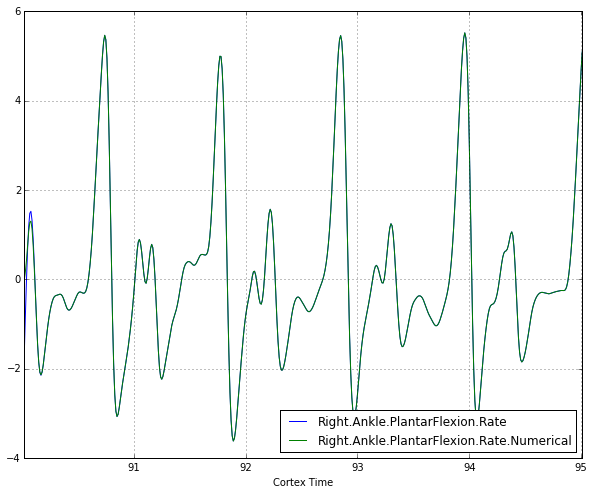

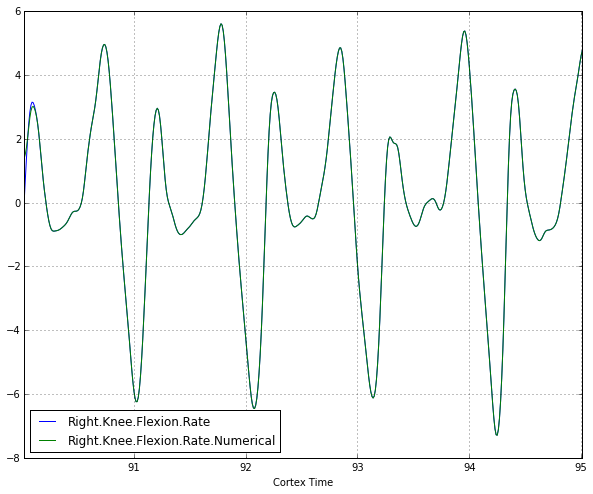

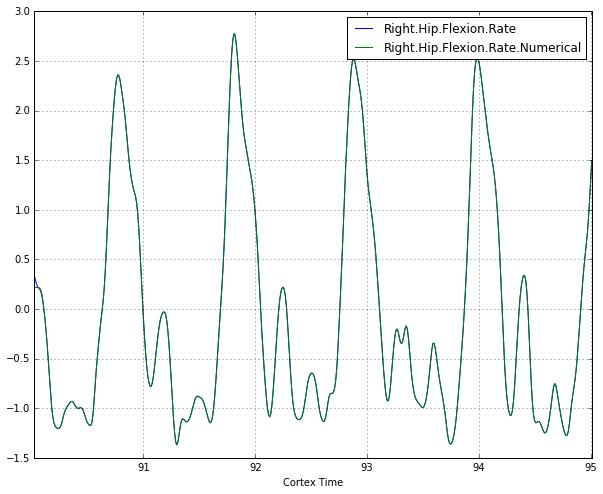

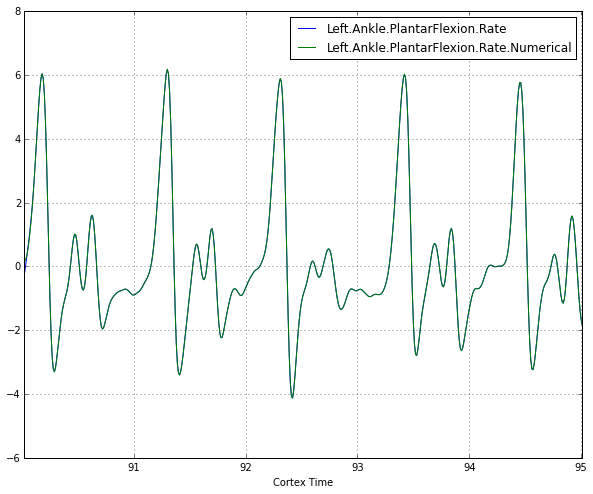

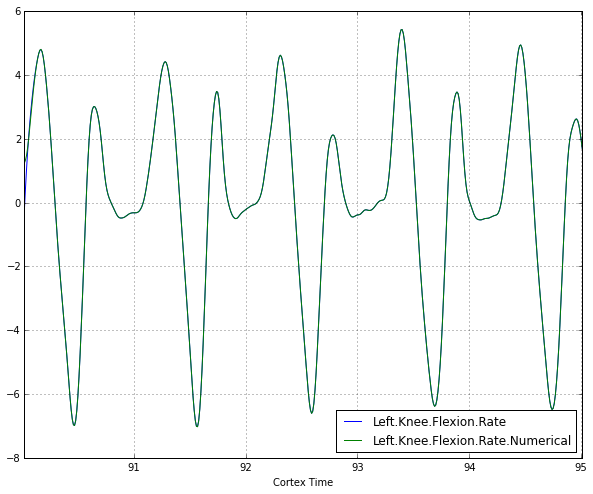

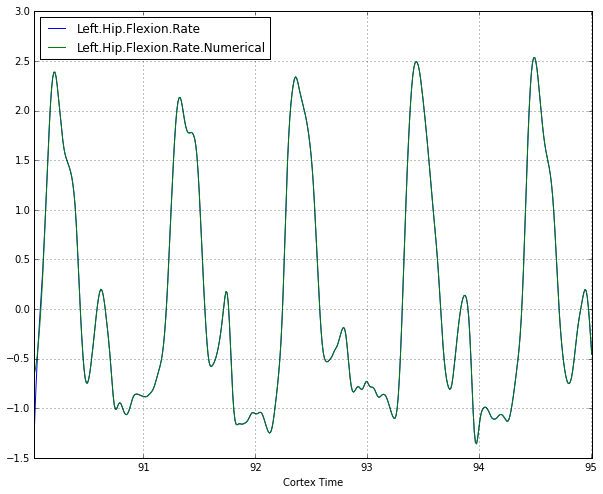

In [13]:
for one, two in zip(rates, numerical_rates):
    axes = walking_data.data[[one, two]].iloc[:500].plot()

# Footer

In [14]:
!git rev-parse HEAD

6af0c229bb0a9edf78f8489d5f0efe02d5685a57


In [15]:
!git --git-dir=/home/moorepants/src/GaitAnalysisToolKit/.git --work-tree=/home/moorepants/src/GaitAnalysisToolKit rev-parse HEAD

9e80dfdcfe0a14b44e0ebcbadb6e9e827d215c3c


In [16]:
%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py

Installed version_information.py. To use it, type:
  %load_ext version_information


In [17]:
%load_ext version_information

In [18]:
%version_information numpy, scipy, pandas, matplotlib, tables, oct2py, dtk, gaitanalysis

Software,Version
Python,2.7.9 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython,3.0.0
OS,Linux 3.13.0 49 generic x86_64 with debian jessie sid
numpy,1.9.2
scipy,0.15.1
pandas,0.16.0
matplotlib,1.4.2
tables,3.1.1
oct2py,3.1.0
dtk,0.4.0


In [19]:
!conda list

# packages in environment at /home/moorepants/anaconda/envs/gait-direct-id-paper:
#
backports.ssl-match-hostname 3.4.0.2                   <pip>
cairo                     1.12.18                       0  
dateutil                  2.4.1                    py27_0  
dynamicisttoolkit         0.4.0                    py27_0  
fastcache                 1.0.2                    py27_0  
fontconfig                2.11.1                        2  
freetype                  2.4.10                        0  
gaitanalysistoolkit (/home/moorepants/src/GaitAnalysisToolKit) 0.2.0.dev0                <pip>
hdf5                      1.8.14                        0  
ipython                   3.0.0                    py27_0  
ipython-notebook          3.0.0                    py27_1  
jinja2                    2.7.3                    py27_1  
jsonschema                2.4.0                    py27_0  
libpng                    1.5.13                        1  
libsodium                 0.4.5         

In [20]:
!pip freeze

backports.ssl-match-hostname==3.4.0.2
DynamicistToolKit==0.4.0
fastcache==1.0.2
-e git+git@github.com:csu-hmc/GaitAnalysisToolKit.git@9e80dfdcfe0a14b44e0ebcbadb6e9e827d215c3c#egg=GaitAnalysisToolKit-origin_speedup-inverse-dynamics
ipython==3.0.0
Jinja2==2.7.3
jsonschema==2.4.0
MarkupSafe==0.23
matplotlib==1.4.2
mistune==0.5.1
nose==1.3.4
numexpr==2.3.1
numpy==1.9.2
oct2py==3.1.0
pandas==0.16.0
ptyprocess==0.4
Pygments==2.0.2
pyparsing==2.0.1
PySide==1.2.1
python-dateutil==2.4.2
pytz==2015.2
PyYAML==3.11
pyzmq==14.5.0
scipy==0.15.1
seaborn==0.5.1
six==1.9.0
snakeviz==0.3.1
sympy==0.7.6
tables==3.1.1
terminado==0.5
tornado==4.1
